<a href="https://colab.research.google.com/github/pravinkr/kaggle-titanic-with-keras/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_file = './train.csv'
#train_file = './titanic-train-test.csv'
#test_file = './test.csv'
test_file = './test-with-labels.csv'

df = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

#df = df_train.append(df_test)


In [ ]:
df_test.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#Exploratory Data Analysis

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.380383,0.486063,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df[['PassengerId','Name']]

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"
...,...,...
886,887,"Montvila, Rev. Juozas"
887,888,"Graham, Miss. Margaret Edith"
888,889,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,"Behr, Mr. Karl Howell"


**Countplot of Survived**

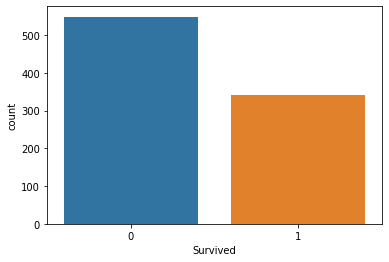

In [ ]:
sns.countplot(df['Survived'])

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Analysis for Pclass**

In [ ]:
df['Pclass'].unique()

array([3, 1, 2])

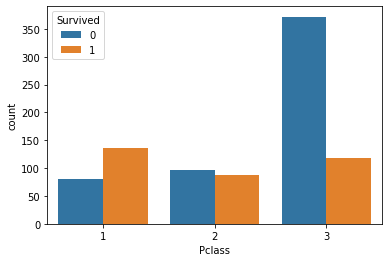

In [ ]:
sns.countplot(df['Pclass'],hue=df['Survived'])

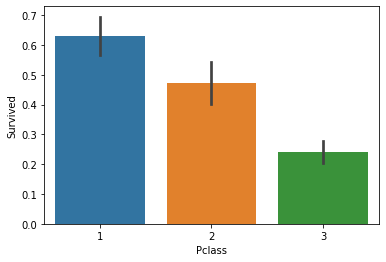

In [ ]:
sns.barplot(x='Pclass',y='Survived',data=df)

In [ ]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived')

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


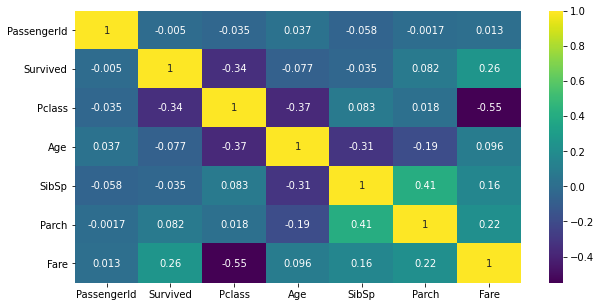

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap='viridis')

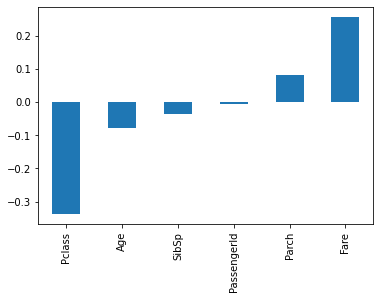

In [ ]:
df.corr()['Survived'].drop(['Survived']).sort_values().plot(kind='bar')

In [ ]:
#Do the same for test data
#df_test = df_test.drop('PassengerId',axis=1)

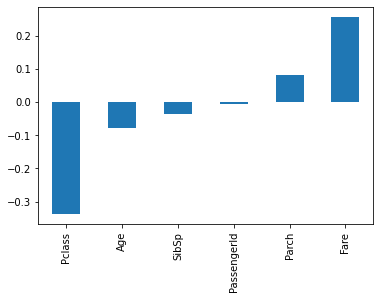

In [ ]:
df.corr()['Survived'].drop(['Survived']).sort_values().plot(kind='bar')

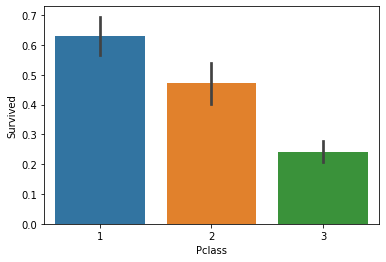

In [ ]:
sns.barplot(y='Survived',x='Pclass',data=df)

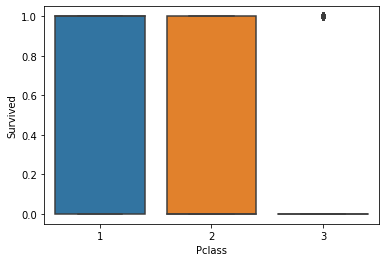

In [ ]:
sns.boxplot(y='Survived',x='Pclass',data=df)

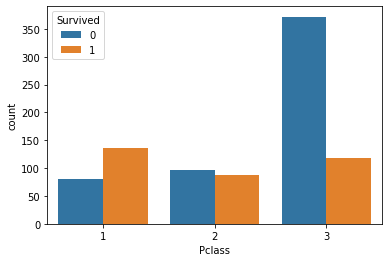

In [ ]:
sns.countplot(x='Pclass',data=df,hue='Survived')

**Pclass being categorical, convert that to dummies **

In [ ]:
dummies_Pclass = pd.get_dummies(df['Pclass'],prefix='Pclass')
df = pd.concat([df.drop('Pclass',axis=1),dummies_Pclass],axis=1)

In [ ]:
#Do the same for df_test
dummies_Pclass = pd.get_dummies(df_test['Pclass'],prefix='Pclass')
df_test = pd.concat([df_test.drop('Pclass',axis=1),dummies_Pclass],axis=1)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

**Analysis on sex field **

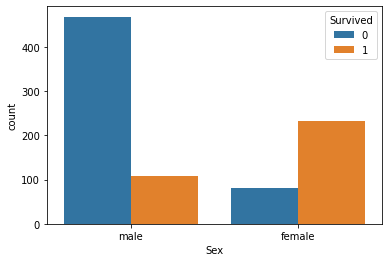

In [ ]:
sns.countplot(df['Sex'], hue=df['Survived'])

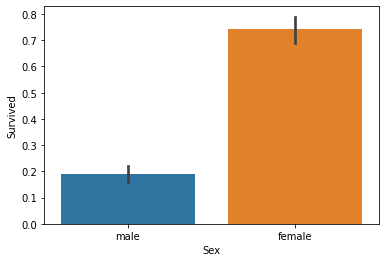

In [ ]:
sns.barplot(y='Survived',x='Sex',data=df)

In [ ]:
df[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


**Convert Sex into Dummies **

In [ ]:
dummies_sex = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df.drop('Sex',axis=1),dummies_sex],axis=1)

In [ ]:
#Do the same for test data
dummies_sex = pd.get_dummies(df_test['Sex'],prefix='Sex')
df_test = pd.concat([df_test.drop('Sex',axis=1),dummies_sex],axis=1)

In [ ]:
df.select_dtypes('object').columns

Index(['Name', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

**Analysis on Cabin **

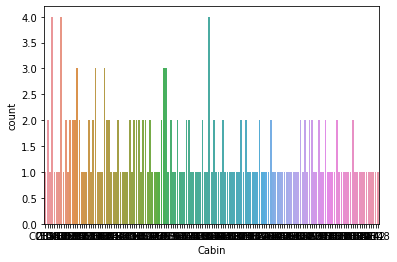

In [ ]:
sns.countplot(df['Cabin'], data=df)

In [ ]:
sorted(df['Cabin'].dropna().unique())

#Create another column with first letter of the Cabin
df['CabinCatagory'] = df['Cabin'].fillna('OTHER').apply(lambda cabin: cabin[:1])

#Create the same for Test data
df_test['CabinCatagory'] = df_test['Cabin'].fillna('OTHER').apply(lambda cabin: cabin[:1])

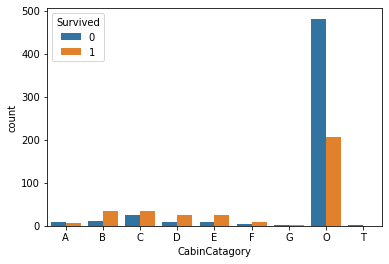

In [ ]:
sns.countplot(df['CabinCatagory'], hue=df['Survived'], order=sorted(df['CabinCatagory'].unique()))

**Since lot of missing and distint values, this columns is being dropped **

In [ ]:
df = df.drop(['Cabin','CabinCatagory'],axis=1)
df_test = df_test.drop(['Cabin','CabinCatagory'],axis=1)

In [ ]:
# cabin_dummies = pd.get_dummies(df['CabinCatagory'], prefix='CabinCatagory')
# df = pd.concat([df.drop(['CabinCatagory','Cabin'],axis=1),cabin_dummies],axis=1)

# #Do the same for Test data
# cabin_dummies = pd.get_dummies(df_test['CabinCatagory'],prefix='CabinCatagory')
# df_test = pd.concat([df_test.drop(['CabinCatagory','Cabin'],axis=1),cabin_dummies],axis=1)


**End Cabin **

#Analysis for Embarked

In [ ]:
df.select_dtypes('object').columns

Index(['Name', 'Ticket', 'Embarked'], dtype='object')

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

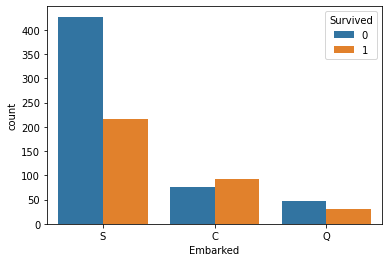

In [ ]:
sns.countplot(x='Embarked',data=df,hue='Survived')

**Convert Embarked to dummies **

In [ ]:
embarked_dummies = pd.get_dummies(df['Embarked'],prefix='Embarked')
df = pd.concat([df.drop('Embarked',axis=1),embarked_dummies],axis=1)
embarked_dummies.shape

#DO the same for Test data
embarked_dummies = pd.get_dummies(df_test['Embarked'],prefix='Embarked')
df_test = pd.concat([df_test.drop('Embarked',axis=1),embarked_dummies],axis=1)
embarked_dummies.shape

(418, 3)

#Analysis for Ticket

In [ ]:
df.select_dtypes('object').columns

Index(['Name', 'Ticket'], dtype='object')

In [ ]:
df['Ticket'].value_counts()

347082           7
1601             7
CA. 2343         7
3101295          6
CA 2144          6
                ..
343275           1
S.W./PP 752      1
SC/Paris 2163    1
W./C. 14258      1
PC 17474         1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
#Ticket should be dropped
df = df.drop('Ticket',axis=1)
df_test = df_test.drop('Ticket',axis=1)

In [ ]:
df.select_dtypes('object').columns

Index(['Name'], dtype='object')

In [ ]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    bool 
 1   Survived     891 non-null    bool 
 2   Name         891 non-null    bool 
 3   Age          891 non-null    bool 
 4   SibSp        891 non-null    bool 
 5   Parch        891 non-null    bool 
 6   Fare         891 non-null    bool 
 7   Pclass_1     891 non-null    bool 
 8   Pclass_2     891 non-null    bool 
 9   Pclass_3     891 non-null    bool 
 10  Sex_female   891 non-null    bool 
 11  Sex_male     891 non-null    bool 
 12  Embarked_C   891 non-null    bool 
 13  Embarked_Q   891 non-null    bool 
 14  Embarked_S   891 non-null    bool 
dtypes: bool(15)
memory usage: 13.2 KB


#Analysis of Name

In [ ]:
df['Name'].apply(lambda s: s.split(', ')[1].split('.')[0]).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
df_test['Name'].apply(lambda s: s.split(', ')[1].split('.')[0]).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

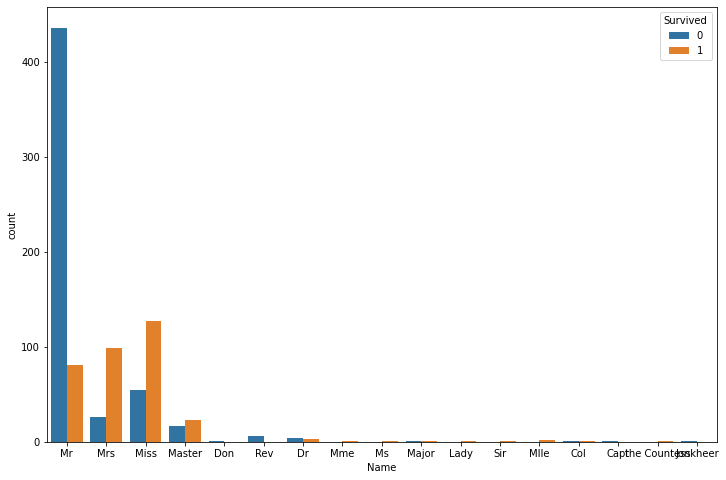

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Name'].apply(lambda s: s.split(', ')[1].split('.')[0]),hue=df['Survived'])

In [ ]:
df['NameTitle'] = df['Name'].apply(lambda s: s.split(', ')[1].split('.')[0])

df['NameTitle'] = df['NameTitle'].replace(['Col', 'Lady',  'Mlle', 'Mme','Ms','the Countess','Sir','Dr'],'Special')
df['NameTitle'] = df['NameTitle'].replace(['Rev', 'Jonkheer'],'Other')
df['NameTitle'] = df['NameTitle'].replace(['Major','Capt','Don'],'Mr')
df['NameTitle'] = df['NameTitle'].replace(['Dona'],'Mrs') #Found in Test dataset
df['NameTitle'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Special'], dtype=object)

In [ ]:
df_test['NameTitle'] = df_test['Name'].apply(lambda s: s.split(', ')[1].split('.')[0])

df_test['NameTitle'] = df_test['NameTitle'].replace(['Col', 'Lady',  'Mlle', 'Mme','Ms','the Countess','Sir','Dr'],'Special')
df_test['NameTitle'] = df_test['NameTitle'].replace(['Rev', 'Jonkheer'],'Other')
df_test['NameTitle'] = df_test['NameTitle'].replace(['Major','Capt','Don'],'Mr')
df_test['NameTitle'] = df_test['NameTitle'].replace(['Dona'],'Mrs') #Found in Test dataset
df_test['NameTitle'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Special', 'Other'], dtype=object)

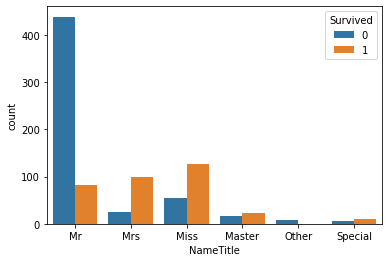

In [ ]:
sns.countplot(df['NameTitle'],hue=df['Survived'])

In [ ]:
nameTitle_dummies = pd.get_dummies(df['NameTitle'],prefix='NameTitle')

df = pd.concat([df,nameTitle_dummies],axis=1)

nameTitle_dummies = pd.get_dummies(df_test['NameTitle'],prefix='NameTitle')

df_test = pd.concat([df_test,nameTitle_dummies],axis=1)


In [ ]:
df = df.drop(['Name','NameTitle'],axis=1)
df_test = df_test.drop(['Name','NameTitle'],axis=1)

#Analysis for Age

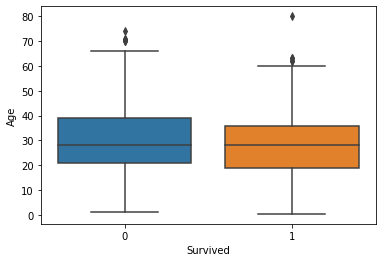

In [ ]:
sns.boxplot(x='Survived',y='Age',data=df)

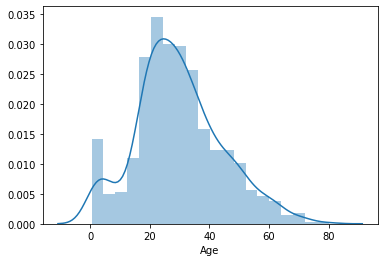

In [ ]:
sns.distplot(df['Age'])

In [ ]:
#grid = sns.FacetGrid(df,row='Pclass',col='Survived')
#grid.map(plt.hist,'Age')
#grid.add_legend()

In [ ]:
df['Age'].isnull().sum()

177

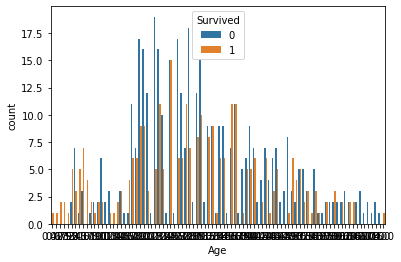

In [ ]:
sns.countplot(df['Age'],hue=df['Survived'])

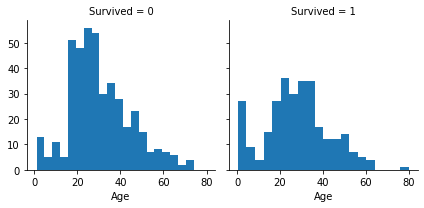

In [ ]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df[(df['Age'].isnull()) & (df['Sex_female'] == 1)].groupby('Survived').count()


,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,NameTitle_Master,NameTitle_Miss,NameTitle_Mr,NameTitle_Mrs,NameTitle_Other,NameTitle_Special
Survived,,,,,,,,,,,,,,,,,,,
0,17,0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
1,36,0,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36


In [ ]:
df[(df['Age'].isnull()) & (df['Sex_male'] == 1)].groupby('Survived').count()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,NameTitle_Master,NameTitle_Miss,NameTitle_Mr,NameTitle_Mrs,NameTitle_Other,NameTitle_Special
Survived,,,,,,,,,,,,,,,,,,,
0,108,0,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
1,16,0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


In [ ]:
df[(df['Sex_female']==1)]['Age'].median()

27.0

In [ ]:
df[(df['Sex_male']==1)]['Age'].median()

29.0

In [ ]:
median_age = df['Age'].median()
median_age

28.0

In [ ]:
#Fill Age of Master Title as per the median age of Masters

df.loc[((df['NameTitle_Master']==1) & (df['Age'].isnull())),'Age'] = df[(df['NameTitle_Master']==1)]['Age'].median()
df_test.loc[((df_test['NameTitle_Master']==1) & (df_test['Age'].isnull())),'Age'] = df_test[(df_test['NameTitle_Master']==1)]['Age'].median()


In [ ]:
#As Median age is almost same for male and females, we fill null with median of both.
df['Age'] = df['Age'].fillna(median_age)
df_test['Age'] = df_test['Age'].fillna(median_age)

In [ ]:
df['Age'].isnull().sum()

0

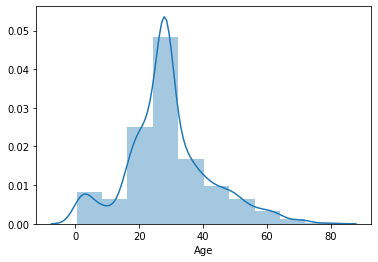

In [ ]:
sns.distplot(df['Age'], bins=10)

In [ ]:
#Creating band of ages with 10 years in each age group
df['AgeBand'] = (df['Age']/10).astype('int')*10
df_test['AgeBand'] = (df_test['Age']/10).astype('int')*10

In [ ]:
#Creating band of ages with 10 years in each age group. Age > 60 is put in last age band of 60
df['AgeBand'] =  df['Age'].apply(lambda age: 60 if (age>=60) else (int(age/10)*10))
df_test['AgeBand'] =  df_test['Age'].apply(lambda age: 60 if (age>=60) else (int(age/10)*10))

In [ ]:
sorted(df['AgeBand'].unique())

[0, 10, 20, 30, 40, 50, 60]

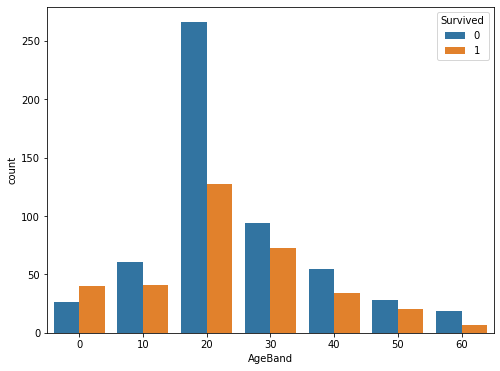

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['AgeBand'], hue=df['Survived'])

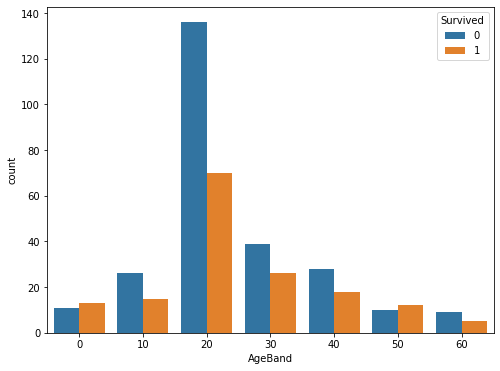

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df_test['AgeBand'], hue=df_test['Survived'])

In [ ]:
df[['AgeBand','Survived']].groupby('AgeBand',as_index=False).mean().sort_values(by='AgeBand')
#Survival rate higer for infants and old age people.

,AgeBand,Survived
0,0,0.606061
1,10,0.401961
2,20,0.323155
3,30,0.437126
4,40,0.382022
5,50,0.416667
6,60,0.269231


In [ ]:
df_test[['AgeBand','Survived']].groupby('AgeBand',as_index=False).mean().sort_values(by='AgeBand')
#Survival rate higer for infants and old age people.

,AgeBand,Survived
0,0,0.541667
1,10,0.365854
2,20,0.339806
3,30,0.400000
4,40,0.391304
5,50,0.545455
6,60,0.357143


In [ ]:
#Dropping 'Age' Columns and creating dummies for AgeBand
df = df.drop('Age',axis=1)
df_test = df_test.drop('Age',axis=1)

ageBand_dummies = pd.get_dummies(df['AgeBand'], prefix='AgeBand')
df = pd.concat([df.drop('AgeBand',axis=1),ageBand_dummies],axis=1)

ageBand_dummies = pd.get_dummies(df_test['AgeBand'], prefix='AgeBand')
df_test = pd.concat([df_test.drop('AgeBand',axis=1),ageBand_dummies],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   SibSp              891 non-null    int64  
 3   Parch              891 non-null    int64  
 4   Fare               891 non-null    float64
 5   Pclass_1           891 non-null    uint8  
 6   Pclass_2           891 non-null    uint8  
 7   Pclass_3           891 non-null    uint8  
 8   Sex_female         891 non-null    uint8  
 9   Sex_male           891 non-null    uint8  
 10  Embarked_C         891 non-null    uint8  
 11  Embarked_Q         891 non-null    uint8  
 12  Embarked_S         891 non-null    uint8  
 13  NameTitle_Master   891 non-null    uint8  
 14  NameTitle_Miss     891 non-null    uint8  
 15  NameTitle_Mr       891 non-null    uint8  
 16  NameTitle_Mrs      891 non

#Analysis on Parch and SibSp

In [ ]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

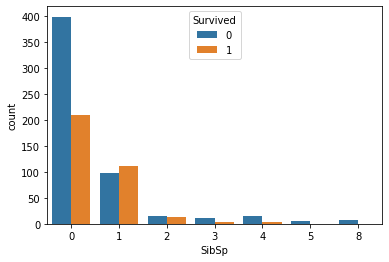

In [ ]:
sns.countplot(x='SibSp',data=df,hue='Survived')

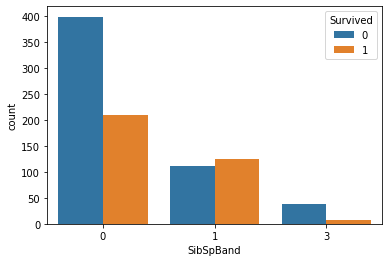

In [ ]:
df['SibSpBand'] = df['SibSp'].apply(lambda sibsp: 0 if (sibsp ==0) else (1 if ((sibsp ==1) | (sibsp == 2)) else 3 ))
df_test['SibSpBand'] = df_test['SibSp'].apply(lambda sibsp: 0 if (sibsp ==0) else (1 if ((sibsp ==1) | (sibsp == 2)) else 3 ))

sns.countplot('SibSpBand',hue='Survived',data=df)

SibSpBand_dummies = pd.get_dummies(df['SibSpBand'],prefix='SibSpBand')
df = pd.concat([df.drop(['SibSpBand'],axis=1),SibSpBand_dummies],axis=1)

SibSpBand_dummies = pd.get_dummies(df_test['SibSpBand'],prefix='SibSpBand')
df_test = pd.concat([df_test.drop(['SibSpBand'],axis=1),SibSpBand_dummies],axis=1)

df = df.drop('SibSp',axis=1)
df_test = df_test.drop('SibSp',axis=1)

In [ ]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

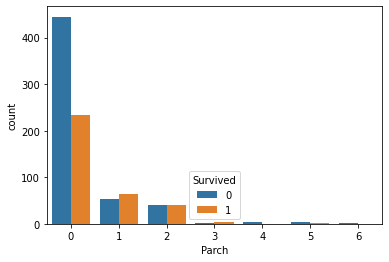

In [ ]:
sns.countplot(x='Parch',hue='Survived',data=df)

In [ ]:
df[['Parch','Survived']].groupby('Parch', as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


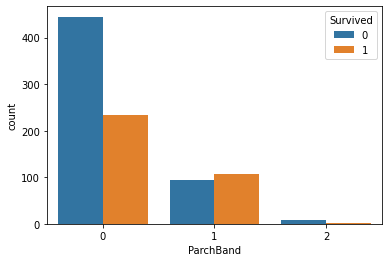

In [ ]:
df['ParchBand'] = df['Parch'].apply(lambda parch: 0 if (parch == 0) else (1 if ((parch == 1) | (parch==2) | (parch==3)) else 2))
df_test['ParchBand'] = df_test['Parch'].apply(lambda parch: 0 if (parch == 0) else (1 if ((parch == 1) | (parch==2) | (parch==3)) else 2))

sns.countplot('ParchBand',hue='Survived',data=df)

ParchBand_dummies = pd.get_dummies(df['ParchBand'],prefix='ParchBand')
df = pd.concat([df.drop('ParchBand',axis=1),ParchBand_dummies],axis=1)

ParchBand_dummies = pd.get_dummies(df_test['ParchBand'],prefix='ParchBand')
df_test = pd.concat([df_test.drop('ParchBand',axis=1),ParchBand_dummies],axis=1)

df = df.drop('Parch',axis=1)
df_test = df_test.drop('Parch',axis=1)

**Create a new column Family with True for passenger with Family **

In [ ]:
#df['Family'] = df['SibSp'] | df['Parch']
#df_test['Family'] = df_test['SibSp'] | df_test['Parch']


## Mark Family as 1 if there is any sibling or Parent/child
#df['Family'] = df['Family'].apply(lambda count: count>0)
#df_test['Family'] = df_test['Family'].apply(lambda count: count>0)

#sns.countplot(df['Family'],hue=df['Survived'])

#df = df.drop(['SibSp','Parch'],axis=1)
#df_test = df_test.drop(['SibSp','Parch'],axis=1)

#Analysis of Fare Column

In [ ]:
df['Fare'].isnull().sum(), df_test['Fare'].isnull().sum()

(0, 1)

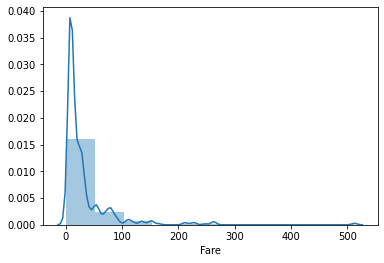

In [ ]:
sns.distplot(df['Fare'], bins=10,)

In [ ]:
df[(df['Fare']>100)][['Fare','Survived']]

,Fare,Survived
27,263.0000,0
31,146.5208,1
88,263.0000,1
118,247.5208,0
195,146.5208,1
215,113.2750,1
258,512.3292,1
268,153.4625,1
269,135.6333,1
297,151.5500,0


In [ ]:
df_test[(df_test['Fare']>100)&(df_test['Sex_female'] == 0)][['Fare','Survived','Sex_female','Sex_male']].sort_values('Fare')

,Fare,Survived,Sex_female,Sex_male
196,134.5000,1,0,1
242,134.5000,1,0,1
252,136.7792,0,0,1
316,146.5208,0,0,1
306,151.5500,0,0,1
217,164.8667,0,0,1
75,211.5000,0,0,1
407,211.5000,0,0,1
81,221.7792,0,0,1
202,227.5250,0,0,1


In [ ]:
#There is 1 missing value in Test data. Filling that with Median fare value.
median_fare = df_test['Fare'].mean()
df_test['Fare'] = df_test['Fare'].fillna(median_fare)
print(f'Filled test data NaN Fare with {median_fare}')

Filled test data NaN Fare with 35.6271884892086


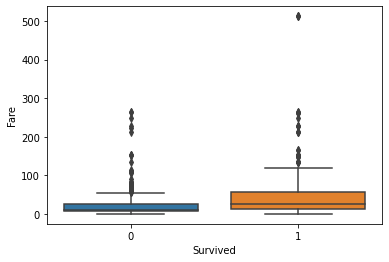

In [ ]:
sns.boxplot(x='Survived',y='Fare',data=df)

In [ ]:
df[['Fare','Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived')

,Fare,Survived
56,8.7125,0.0
160,32.3208,0.0
76,11.5000,0.0
163,33.5000,0.0
164,34.0208,0.0
...,...,...
161,32.5000,1.0
77,12.0000,1.0
79,12.2875,1.0
44,8.1125,1.0


In [ ]:
#Putting Fare > 100 in one band and rest in band increment of 10
#df['FareBand'] = df['Fare'].apply(lambda fare: 100 if (fare >=100) else (int(fare/10)*10))
#df_test['FareBand'] = df_test['Fare'].apply(lambda fare: 100 if (fare >= 100) else (int(fare/10)*10))


df['FareBand'] = df['Fare'].apply(lambda fare: "<10" if (fare < 10) else ("10-50" if ((fare >= 10) & (fare < 50)) else ("50-100" if ((fare>=50) & (fare<100)) else ">100")))
df_test['FareBand'] = df_test['Fare'].apply(lambda fare: "<10" if (fare < 10) else ("10-50" if ((fare >= 10) & (fare < 50)) else ("50-100" if ((fare>=50) & (fare<100)) else ">100")))


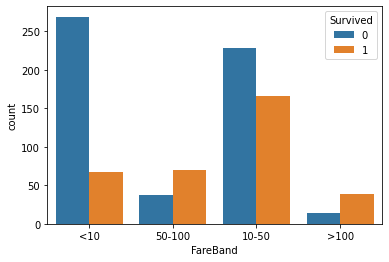

In [ ]:
sns.countplot('FareBand',data=df,hue='Survived')

In [ ]:
df.groupby('FareBand').count()


,PassengerId,Survived,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,NameTitle_Master,NameTitle_Miss,NameTitle_Mr,NameTitle_Mrs,NameTitle_Other,NameTitle_Special,AgeBand_0,AgeBand_10,AgeBand_20,AgeBand_30,AgeBand_40,AgeBand_50,AgeBand_60,SibSpBand_0,SibSpBand_1,SibSpBand_3,ParchBand_0,ParchBand_1,ParchBand_2
FareBand,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10-50,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394
50-100,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
<10,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336
>100,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53


In [ ]:
#df['FareBand'] = (df['Fare']/30).astype(int)
#df_test['FareBand'] = (df_test['Fare']/30).astype(int)

In [ ]:
df[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand')

,FareBand,Survived
0,10-50,0.421320
1,50-100,0.648148
2,<10,0.199405
3,>100,0.735849


In [ ]:
fare_dummies = pd.get_dummies(df['FareBand'],prefix='FareBand')
df = pd.concat([df.drop('FareBand',axis=1),fare_dummies],axis=1)

fare_dummies = pd.get_dummies(df_test['FareBand'],prefix='FareBand')
df_test = pd.concat([df_test.drop('FareBand',axis=1),fare_dummies],axis=1)

df = df.drop('Fare',axis=1)
df_test = df_test.drop('Fare',axis=1)

In [ ]:
df.shape, df_test.shape

((891, 33), (418, 33))

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived','PassengerId'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

print(f'Train Data Shape: {X_train.shape,y_train.shape}')
print(f'Test  Data Shape  {X_test.shape,  y_test.shape}')

Train Data Shape: ((846, 31), (846,))
Test  Data Shape  ((45, 31), (45,))


#Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'Train size: {X_train.shape}')
print(f'Test Size : {X_test.shape}')
print(f'Train Data Columns: {sorted(df.columns)}')
print(f'Test Data Columns:  {sorted(df_test.columns)}')

Train size: (846, 31)
Test Size : (45, 31)
Train Data Columns: ['AgeBand_0', 'AgeBand_10', 'AgeBand_20', 'AgeBand_30', 'AgeBand_40', 'AgeBand_50', 'AgeBand_60', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FareBand_10-50', 'FareBand_50-100', 'FareBand_<10', 'FareBand_>100', 'NameTitle_Master', 'NameTitle_Miss', 'NameTitle_Mr', 'NameTitle_Mrs', 'NameTitle_Other', 'NameTitle_Special', 'ParchBand_0', 'ParchBand_1', 'ParchBand_2', 'PassengerId', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSpBand_0', 'SibSpBand_1', 'SibSpBand_3', 'Survived']
Test Data Columns:  ['AgeBand_0', 'AgeBand_10', 'AgeBand_20', 'AgeBand_30', 'AgeBand_40', 'AgeBand_50', 'AgeBand_60', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FareBand_10-50', 'FareBand_50-100', 'FareBand_<10', 'FareBand_>100', 'NameTitle_Master', 'NameTitle_Miss', 'NameTitle_Mr', 'NameTitle_Mrs', 'NameTitle_Other', 'NameTitle_Special', 'ParchBand_0', 'ParchBand_1', 'ParchBand_2', 'PassengerId', 'Pclass_1', 'Pclass_2', 'Pclass_3', 

#Defining Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



Epoch 1/200
27/27 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5508 - val_loss: 0.6921 - val_accuracy: 0.5111
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5615 - val_loss: 0.6898 - val_accuracy: 0.5111
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5544 - val_loss: 0.6878 - val_accuracy: 0.6222
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5887 - val_loss: 0.6864 - val_accuracy: 0.7111
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5792 - val_loss: 0.6851 - val_accuracy: 0.7333
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5780 - val_loss: 0.6839 - val_accuracy: 0.7556
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.6135 - val_loss: 0.6831 - val_accuracy: 0.7778
Epoch 8/200
2

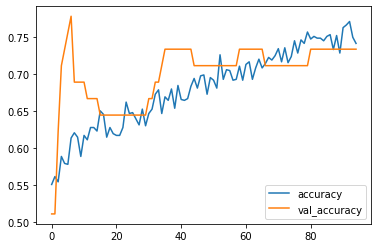

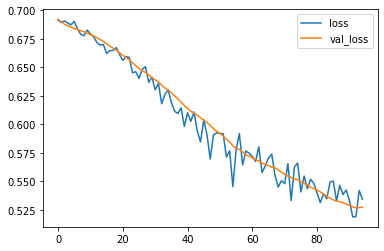

In [ ]:
# With 79 % Accuracy
model = Sequential()
model.add(Dense(27,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='relu'))
#model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

earlyStop = EarlyStopping(monitor='val_loss',patience=2)

epochs=200
model.fit(x=X_train,y=y_train,batch_size=32,epochs=epochs,
          validation_data=(X_test,y_test),callbacks = [earlyStop])

metrics = pd.DataFrame(model.history.history)
metrics[['accuracy', 'val_accuracy']].plot()
metrics[['loss', 'val_loss']].plot()

#Evaluation Metrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predicted = model.predict_classes(X_test)
print(classification_report(y_test,predicted))
print('Confusion Matrix: \n',confusion_matrix(y_test,predicted))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.75      0.50      0.60        18

    accuracy                           0.73        45
   macro avg       0.74      0.69      0.70        45
weighted avg       0.74      0.73      0.72        45

Confusion Matrix: 
 [[24  3]
 [ 9  9]]


In [ ]:
test_data = df_test

print(test_data.shape)

test_y = test_data[['PassengerId', 'Survived']]
test_X = scaler.transform(test_data.drop(['PassengerId','Survived'],axis=1))
prediciton_on_testdata = model.predict_classes(test_X)

output = pd.concat([df_test['PassengerId'], pd.DataFrame(prediciton_on_testdata, columns=['Survived'])], axis=1)
output.to_csv('submission4.csv', index=False)

print(classification_report(test_y.drop('PassengerId',axis=1),prediciton_on_testdata))

confusion_matrix(test_y.drop('PassengerId',axis=1),prediciton_on_testdata)


(418, 33)
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       259
           1       0.75      0.67      0.71       159

    accuracy                           0.79       418
   macro avg       0.78      0.77      0.77       418
weighted avg       0.79      0.79      0.79       418



array([[223,  36],
       [ 52, 107]])

In [ ]:
225,34,55,104

(225, 34, 55, 104)